In [ ]:
"""examples in using the network module"""

In [1]:
%load_ext autoreload
%autoreload 2

# adding parent directory to import path
# otherwise simply place the 'network' folder in the same directory
import sys
import os
parent = os.path.dirname(os.path.abspath(''))
sys.path.append(parent)


import network

import gc
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
### MNIST classification
# please place the dataset manually inside this folder

# load
train = pd.read_csv("mnist_train.csv", header=None)
test = pd.read_csv("mnist_test.csv", header=None)

# preprocess X
X   = train.iloc[:, 1:].to_numpy(np.float32) / 255.0 * 0.99 + 0.01
X_t = test.iloc[:, 1:].to_numpy(np.float32) / 255.0 * 0.99 + 0.01

# one hot encode y
y   = np.eye(10)[train.iloc[:,0].to_numpy((int))]
y_t = np.eye(10)[test.iloc[:,0].to_numpy((int))]
y_true = np.argmax(y_t, axis=1)

del test, train

In [3]:
# define network
nn = network.NeuralNetwork([
                    network.Linear_layer(784, 200, bias=None),
                    network.Activation_layer('ReLU'),
    
                    network.Linear_layer(200, 10, bias=None),
                    network.Activation_layer('fast_softmax')
                    ])
param = {"lr": 1e-3, 'batch': 16, "mode": "train", "eps": 1e-9, "beta":(0.9, 0.999), 
         "epoch": 0, 'optimizer': 'Adam', 't': 1, 'clip': 1.0, 'decay': 0.0}

In [4]:
for i in range(5):
    nn.train(X, y, param, rand=True, loss_func='fast_cross_entropy')
    yhat = nn(X_t, mode='classification')
    accuracy = accuracy_score(y_true, yhat) * 100
    print(f"Epoch {i}, Performance = {accuracy}")
    param['lr'] *= 0.9
gc.collect()

Average loss = 3.432325.
Epoch 0, Performance = 96.65
Average loss = 1.393894.
Epoch 1, Performance = 97.21
Average loss = 0.921310.
Epoch 2, Performance = 97.86


KeyboardInterrupt: 

In [5]:
nn.print_parameters()

--0--
Printing linear layer:
{'bias': None,
 'input': array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       ...,
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]], dtype=float32),
 'input_nodes': 784,
 'm1': array([[-4.56788446e-08, -3.37637989e-07, -4.15270370e-07, ...,
        -4.17579196e-06,  4.45680904e-06, -3.29595983e-07],
       [-4.56788446e-08, -3.37637989e-07, -4.15270370e-07, ...,
        -4.17579196e-06,  4.45680904e-06, -3.29595983e-07],
       [-4.56788446e-08, -3.37637989e-07, -4.15270370e-07, ...,
        -4.17579196e-06,  4.45680904e-06, -3.29595983e-07],
       ...,
       [-4.56788446e-08, -3.37637989e-07, -4.15270370e-07, ...,
        -4.17579196e-06,  4.45680904e-06, -3.29595983e-07],
       [-4.56788446e-08, -3.37637989e-07, -4.15270370e-07, ...,
        -4.175791

In [6]:
### Regression

x1 = np.arange(1,100)
x2 = np.arange(1,100)+1
x3 = np.stack((x1,x2)).T

x4 = x1*x2/99+x1
x4 = np.expand_dims(x4,axis=1)

In [7]:
# Maxout layer is a good choice for regression tasks thanks to its high complexity
nn2 = network.NeuralNetwork([
                    network.Maxout_layer(2, 20),
                    network.Maxout_layer(20, 1)
                    ])
param = {"lr": 1e-3, 'batch': 16, "mode": "train", "eps": 1e-9, "beta":(0.9, 0.999), 
         "epoch": 0, 'optimizer': 'Adam', 't': 1, 'clip': 1.0, 'decay': 0.0}

In [8]:
temp = nn2.layers[0].w1

In [9]:
for _ in range(1000):
    nn2.train(x3, x4, param)

Average loss = 1467.603116.
Average loss = 828.350212.
Average loss = 381.937697.
Average loss = 202.350451.
Average loss = 177.803089.
Average loss = 201.881748.
Average loss = 191.323013.
Average loss = 175.533666.
Average loss = 176.251075.
Average loss = 177.617987.
Average loss = 175.656896.
Average loss = 174.540761.
Average loss = 174.245917.
Average loss = 172.835568.
Average loss = 172.894721.
Average loss = 171.927454.
Average loss = 171.485485.
Average loss = 171.658132.
Average loss = 171.338748.
Average loss = 170.391520.
Average loss = 170.192945.
Average loss = 170.575849.
Average loss = 168.697300.
Average loss = 169.466577.
Average loss = 168.962113.
Average loss = 167.559123.
Average loss = 166.885667.
Average loss = 168.239960.
Average loss = 165.712708.
Average loss = 165.376352.
Average loss = 166.324604.
Average loss = 165.028128.
Average loss = 164.483603.
Average loss = 163.773350.
Average loss = 161.770642.
Average loss = 164.644926.
Average loss = 163.394897.


In [10]:
print(f"{param['epoch']} epoch trained.")

# errors
nn2.query(x3, mode='not classification') - x4

1000 epoch trained.


array([[-0.61751627],
       [-0.43862728],
       [-0.2799403 ],
       [-0.14145535],
       [-0.02317242],
       [ 0.07490849],
       [ 0.15278738],
       [ 0.21046426],
       [ 0.24793911],
       [ 0.26521194],
       [ 0.26228275],
       [ 0.23915154],
       [ 0.19581831],
       [ 0.13228306],
       [ 0.04854579],
       [-0.05378666],
       [ 0.05704794],
       [ 0.14768051],
       [ 0.21811107],
       [ 0.26833961],
       [ 0.29836612],
       [ 0.30819062],
       [ 0.2978131 ],
       [ 0.26723355],
       [ 0.21645199],
       [ 0.1454684 ],
       [ 0.0542828 ],
       [-0.05710483],
       [ 0.04262425],
       [ 0.14070582],
       [ 0.21858537],
       [ 0.27626289],
       [ 0.3137384 ],
       [ 0.33101189],
       [ 0.32808335],
       [ 0.3049528 ],
       [ 0.35962731],
       [ 0.43197935],
       [ 0.48412937],
       [ 0.51607736],
       [ 0.52782334],
       [ 0.5193673 ],
       [ 0.49070924],
       [ 0.44184915],
       [ 0.37278705],
       [ 0

In [11]:
# this is the total weight updates our 1st layer received

# Maxout also suffers from the dying ReLU problem,
# Zeros below represent dead nodes
temp - nn2.layers[0].w1

array([[ 0.        ,  0.01765873, -0.30331122,  0.        , -0.04289169,
         0.        , -0.28979272, -0.02952687, -1.35488243,  0.0866327 ,
        -0.01924133,  0.04080151,  0.05466402, -0.03219964,  0.        ,
        -0.01987738,  0.        , -0.02264342,  0.03017396,  0.        ],
       [ 0.        , -0.24444836, -0.36591948,  0.        , -0.10112348,
         0.        , -0.5155753 , -0.09266805, -1.55446145,  0.1544332 ,
        -0.074034  ,  0.09725489,  0.11477714, -0.09229422,  0.        ,
        -0.07521719,  0.        , -0.30636752,  0.03016482,  0.        ],
       [ 0.        , -2.21345007, -3.23712996,  0.        , -2.67165193,
         0.        , -2.04835273, -2.91974715, -2.83562493,  3.46428341,
        -2.45689057,  2.59583754,  2.78277699, -2.79676433,  0.        ,
        -2.48319581,  0.        , -2.28742419,  0.02935333,  0.        ]])

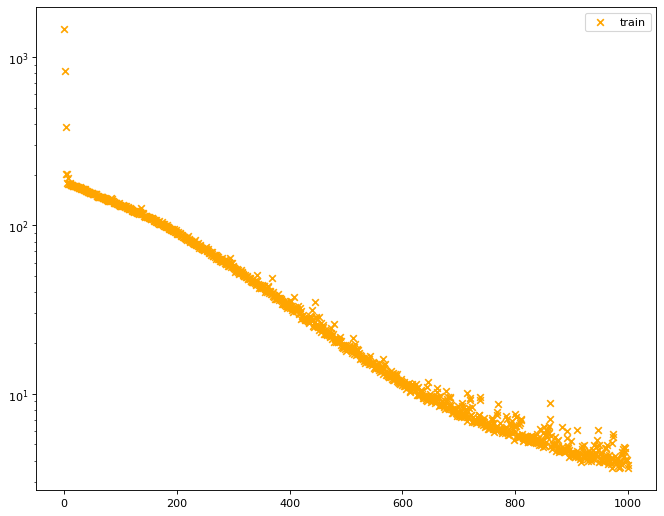

In [12]:
nn2.plot_loss()

In [15]:
nn2(x3, mode='asd')-x4

array([[-0.61751627],
       [-0.43862728],
       [-0.2799403 ],
       [-0.14145535],
       [-0.02317242],
       [ 0.07490849],
       [ 0.15278738],
       [ 0.21046426],
       [ 0.24793911],
       [ 0.26521194],
       [ 0.26228275],
       [ 0.23915154],
       [ 0.19581831],
       [ 0.13228306],
       [ 0.04854579],
       [-0.05378666],
       [ 0.05704794],
       [ 0.14768051],
       [ 0.21811107],
       [ 0.26833961],
       [ 0.29836612],
       [ 0.30819062],
       [ 0.2978131 ],
       [ 0.26723355],
       [ 0.21645199],
       [ 0.1454684 ],
       [ 0.0542828 ],
       [-0.05710483],
       [ 0.04262425],
       [ 0.14070582],
       [ 0.21858537],
       [ 0.27626289],
       [ 0.3137384 ],
       [ 0.33101189],
       [ 0.32808335],
       [ 0.3049528 ],
       [ 0.35962731],
       [ 0.43197935],
       [ 0.48412937],
       [ 0.51607736],
       [ 0.52782334],
       [ 0.5193673 ],
       [ 0.49070924],
       [ 0.44184915],
       [ 0.37278705],
       [ 0